# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}' #forecast?id=524901&

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Variable for returned unit of measurement
unit ='metric'

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&units={unit}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))


    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hamilton
Processing Record 2 of Set 1 | tromso
Processing Record 3 of Set 1 | along
Processing Record 4 of Set 1 | letlhakane
Processing Record 5 of Set 1 | san pedro
Processing Record 6 of Set 1 | hinton
Processing Record 7 of Set 1 | uzgen
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 10 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 11 of Set 1 | magadi
Processing Record 12 of Set 1 | petropavlovsk-kamchatsky
Processing Record 13 of Set 1 | buala
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | kodinsk
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | afaahiti
Processing Record 21 of Set 

In [40]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [41]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hamilton,39.1834,-84.5333,33.11,70,0,4.63,US,1690574557
1,tromso,69.6496,18.9570,11.88,82,20,4.63,NO,1690575336
2,along,28.1667,94.7667,23.36,99,81,0.37,IN,1690575336
3,letlhakane,-21.4167,25.5833,17.62,34,19,2.03,BW,1690575337
4,san pedro,14.3500,121.0167,24.62,97,75,4.63,PH,1690575028


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [43]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,33.11,70,0,4.63,US,1690574557
1,tromso,69.6496,18.9570,11.88,82,20,4.63,NO,1690575336
2,along,28.1667,94.7667,23.36,99,81,0.37,IN,1690575336
3,letlhakane,-21.4167,25.5833,17.62,34,19,2.03,BW,1690575337
4,san pedro,14.3500,121.0167,24.62,97,75,4.63,PH,1690575028


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

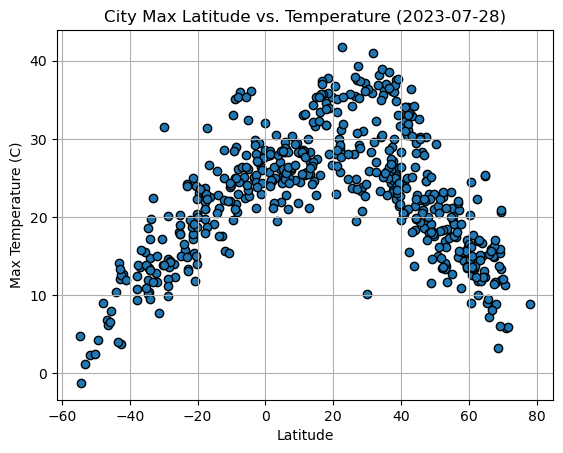

In [54]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolors='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.title(f'City Max Latitude vs. Temperature ({time.strftime("%Y-%m-%d")})') # dynamic changing title for current date

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

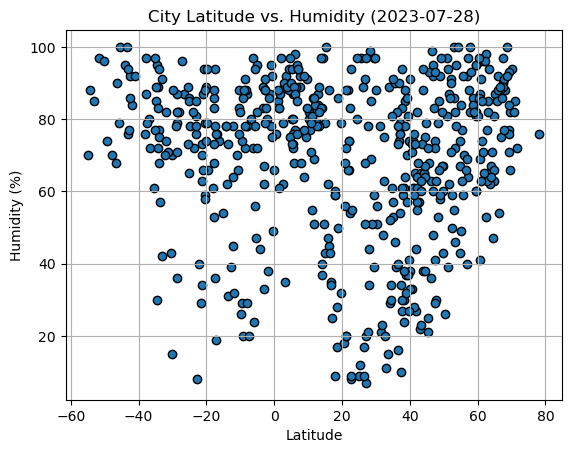

In [57]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title(f'City Latitude vs. Humidity ({time.strftime("%Y-%m-%d")})') # dynamic changing title for current date

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

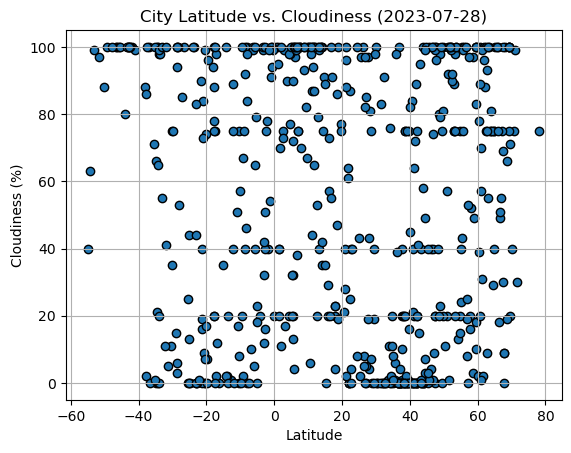

In [59]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%Y-%m-%d")})') # dynamic changing title for current date

# Save the figure
# plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

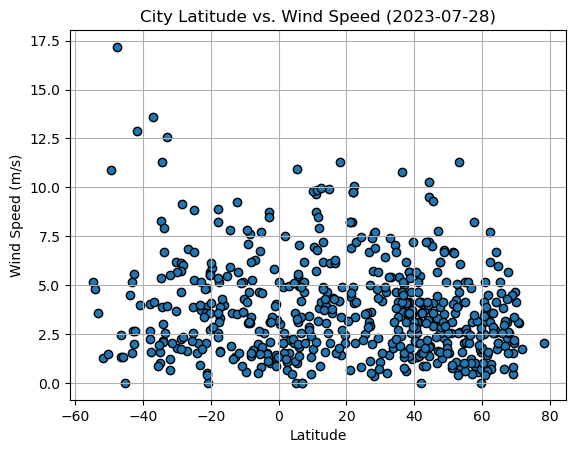

In [62]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%Y-%m-%d")})') # dynamic changing title for current date

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [78]:
# Define a function to create Linear Regression plots
def linplot(x_label,y_label,df,loc = 'upper_right'):
    '''Plots regression line and data points for specified columns of a dataframe'''
    x = df[x_label]
    y = df[y_label]
    m, b, r, p, se = linregress(x, y)
    regress_vals = x * m + b
    line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
    print(f"The r-squared is: {r**2}")
    if loc == 'upper_left':
        xy = (0.05,0.95)
    elif loc == 'lower_right':
        xy = (0.95,0.05)
    elif loc == 'lower_left':
        xy = (0.05,0.05)
    else:
        xy = (0.95,0.95)
    plt.scatter(x,y)
    plt.plot(x,regress_vals,"r-")
    plt.annotate(line_eq,xy = xy,xycoords='axes fraction',fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout()
    plt.show()


In [65]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,33.11,70,0,4.63,US,1690574557
1,tromso,69.6496,18.9570,11.88,82,20,4.63,NO,1690575336
2,along,28.1667,94.7667,23.36,99,81,0.37,IN,1690575336
4,san pedro,14.3500,121.0167,24.62,97,75,4.63,PH,1690575028
5,hinton,53.4001,-117.5857,13.74,72,98,2.59,CA,1690575337


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,letlhakane,-21.4167,25.5833,17.62,34,19,2.03,BW,1690575337
7,adamstown,-25.0660,-130.1015,20.31,65,44,8.86,PN,1690575337
10,buala,-8.1450,159.5921,26.11,87,100,3.38,SB,1690575338
13,blackmans bay,-43.0167,147.3167,12.07,76,100,2.67,AU,1690575339
14,edinburgh of the seven seas,-37.0676,-12.3116,13.57,80,100,13.59,SH,1690575339


###  Temperature vs. Latitude Linear Regression Plot

In [108]:
# Define a function to create Linear Regression plots
def weather_linplot(x_label,y_label,df,loc = 'upper_right'):
    '''Plots regression line and data points for specified columns of a dataframe'''
    x = df[x_label]
    y = df[y_label]
    m, b, r, p, se = linregress(x, y)
    regress_vals = x * m + b
    line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
    print(f"The r-value is: {abs(r)}")
    if loc == 'upper_left':
        xy = (0.05,0.9)
    elif loc == 'lower_right':
        xy = (0.55,0.1)
    elif loc == 'lower_left':
        xy = (0.05,0.1)
    else:
        xy = (0.55,0.9)
    plt.scatter(x,y)
    plt.plot(x,regress_vals,"r-")
    plt.annotate(line_eq,xy = xy,xycoords='axes fraction',fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# rename columns to fix axis label
southern_hemi_df = southern_hemi_df.rename(columns = {'Lat':'Latitude','Lng':'Longitude'})
northern_hemi_df = northern_hemi_df.rename(columns = {'Lat':'Latitude','Lng':'Longitude'})

The r-value is: 0.6331774056894373


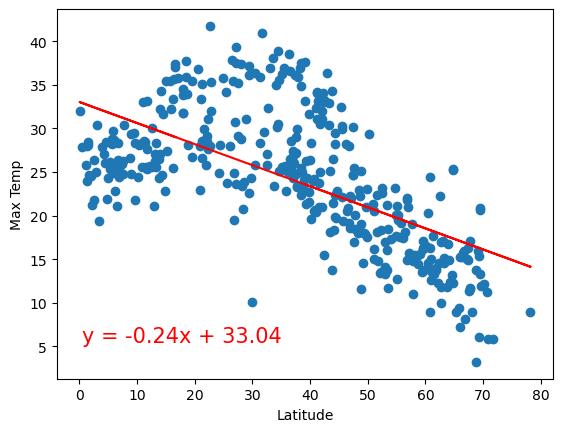

In [109]:
# Linear regression on Northern Hemisphere
weather_linplot('Latitude','Max Temp',northern_hemi_df,loc = 'lower_left')

The r-value is: 0.8505806548732968


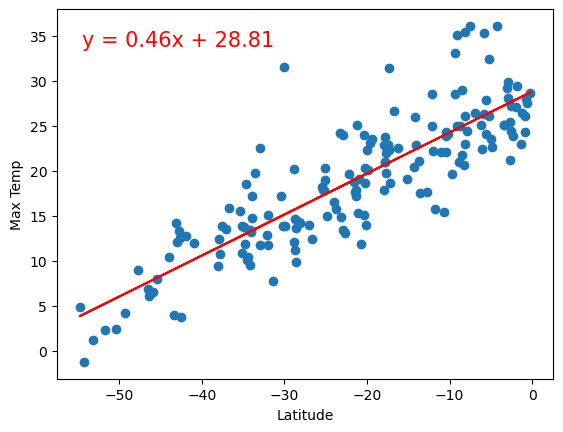

In [111]:
# Linear regression on Southern Hemisphere
weather_linplot('Latitude','Max Temp',southern_hemi_df,loc = 'upper_left')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05661331442336815


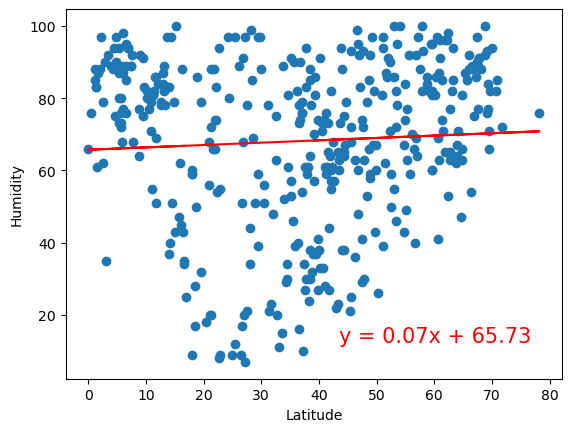

In [113]:
# Northern Hemisphere
weather_linplot('Latitude','Humidity',northern_hemi_df,loc = 'lower_right')

The r-value is: 0.21227845138093754


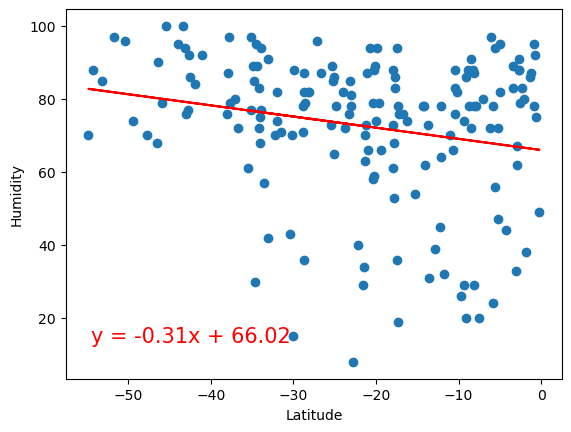

In [115]:
# Southern Hemisphere
weather_linplot('Latitude','Humidity',southern_hemi_df,loc = 'lower_left')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05715833977327261


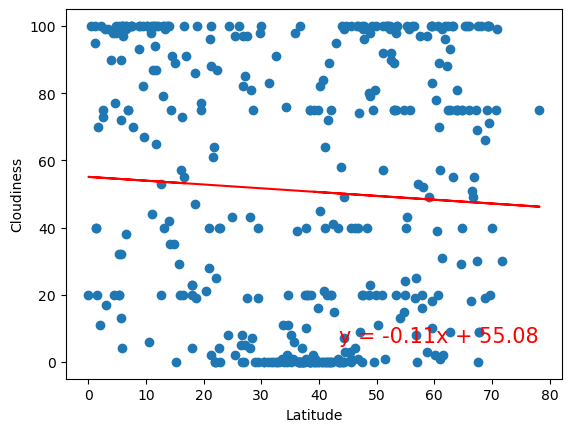

In [116]:
# Northern Hemisphere
weather_linplot('Latitude','Cloudiness',northern_hemi_df,loc = 'lower_right')

The r-value is: 0.19274041174532733


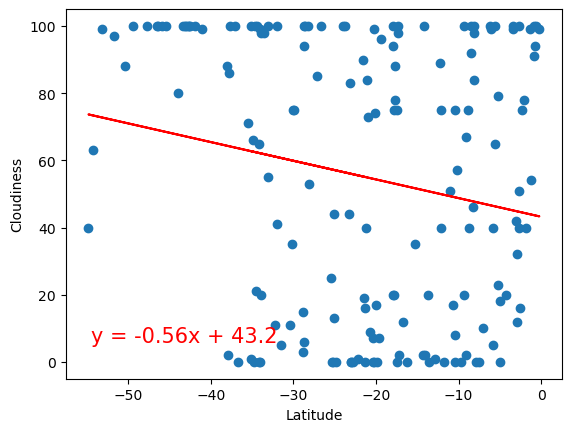

In [118]:
# Southern Hemisphere
weather_linplot('Latitude','Cloudiness',southern_hemi_df,loc = 'lower_left')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.18227760888058284


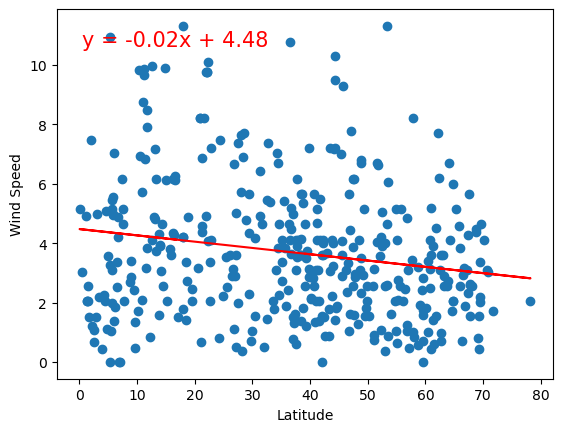

In [120]:
# Northern Hemisphere
weather_linplot('Latitude','Wind Speed',northern_hemi_df,loc = 'upper_left')

The r-value is: 0.12665724787693103


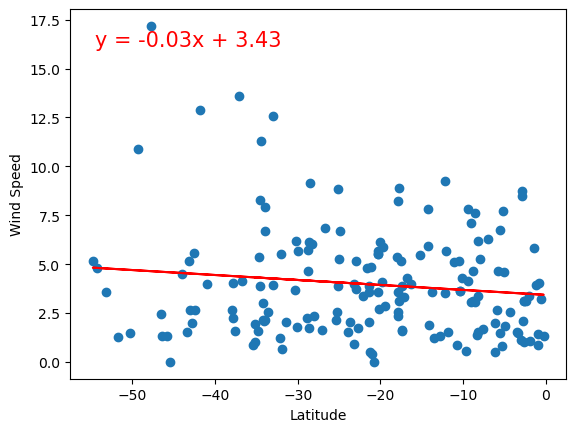

In [121]:
# Southern Hemisphere
weather_linplot('Latitude','Wind Speed',southern_hemi_df,loc = 'upper_left')

**Discussion about the linear relationship:** YOUR RESPONSE HERE